In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 데이터 불러오기

In [2]:
train = pd.read_csv("data/train.csv")
train = train.drop(['index'], axis=1)  # index 컬럼 삭제 무의미한 데이터

test = pd.read_csv("data/test_x.csv")
test = test.drop(['index'], axis=1)

## 데이터 확인

### train셋 확인

In [3]:
train.head(10)  # 데이터 확인

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
5,2.0,834,1.0,1769,4.0,2105,1.0,1070,5.0,1930,...,0,0,0,0,1,0,0,0,0,0
6,1.0,1382,1.0,1473,5.0,1479,4.0,2403,1.0,616,...,1,1,1,1,1,0,1,0,1,1
7,1.0,384,1.0,908,5.0,870,1.0,1059,1.0,1266,...,1,1,1,1,1,1,1,0,1,1
8,5.0,795,2.0,3469,4.0,1693,3.0,1991,4.0,5922,...,0,0,0,0,1,0,0,0,1,1
9,2.0,1668,1.0,866,1.0,895,1.0,1308,2.0,1715,...,1,1,0,1,1,0,1,1,1,1


In [4]:
train.info()  # 데이터 유형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

In [5]:
train.isna().sum()

QaA      0
QaE      0
QbA      0
QbE      0
QcA      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 77, dtype: int64

In [6]:
test.isna().sum()

QaA      0
QaE      0
QbA      0
QbE      0
QcA      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 76, dtype: int64

## 라벨 인코딩

In [7]:
train_age = pd.Categorical(train['age_group'])
train_gender = pd.Categorical(train['gender'])
train_race = pd.Categorical(train['race'])
train_religion = pd.Categorical(train['religion'])

test_age = pd.Categorical(test['age_group'])
test_gender = pd.Categorical(test['gender'])
test_race = pd.Categorical(test['race'])
test_religion = pd.Categorical(test['religion'])

In [8]:
train['age_group'] = train_age.codes
train['gender'] = train_gender.codes
train['race'] = train_race.codes
train['religion'] = train_religion.codes

test['age_group'] = test_age.codes
test['gender'] = test_gender.codes
test['race'] = test_race.codes
test['religion'] = test_religion.codes

train['age_group']

0        3
1        2
2        3
3        2
4        2
        ..
45527    1
45528    3
45529    1
45530    4
45531    2
Name: age_group, Length: 45532, dtype: int8

In [9]:
train = train.astype('float64')
test = test.astype('float64')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  float64
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  float64
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  float64
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  float64
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  float64
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  float64
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  float64
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  float64
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  float64
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

## 데이터 전처리 전 시각화

C:\Users\mhs\AppData\Local\Temp\ipykernel_28060\3915146891.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(train.corr(), dtype=np.bool)


<AxesSubplot:>

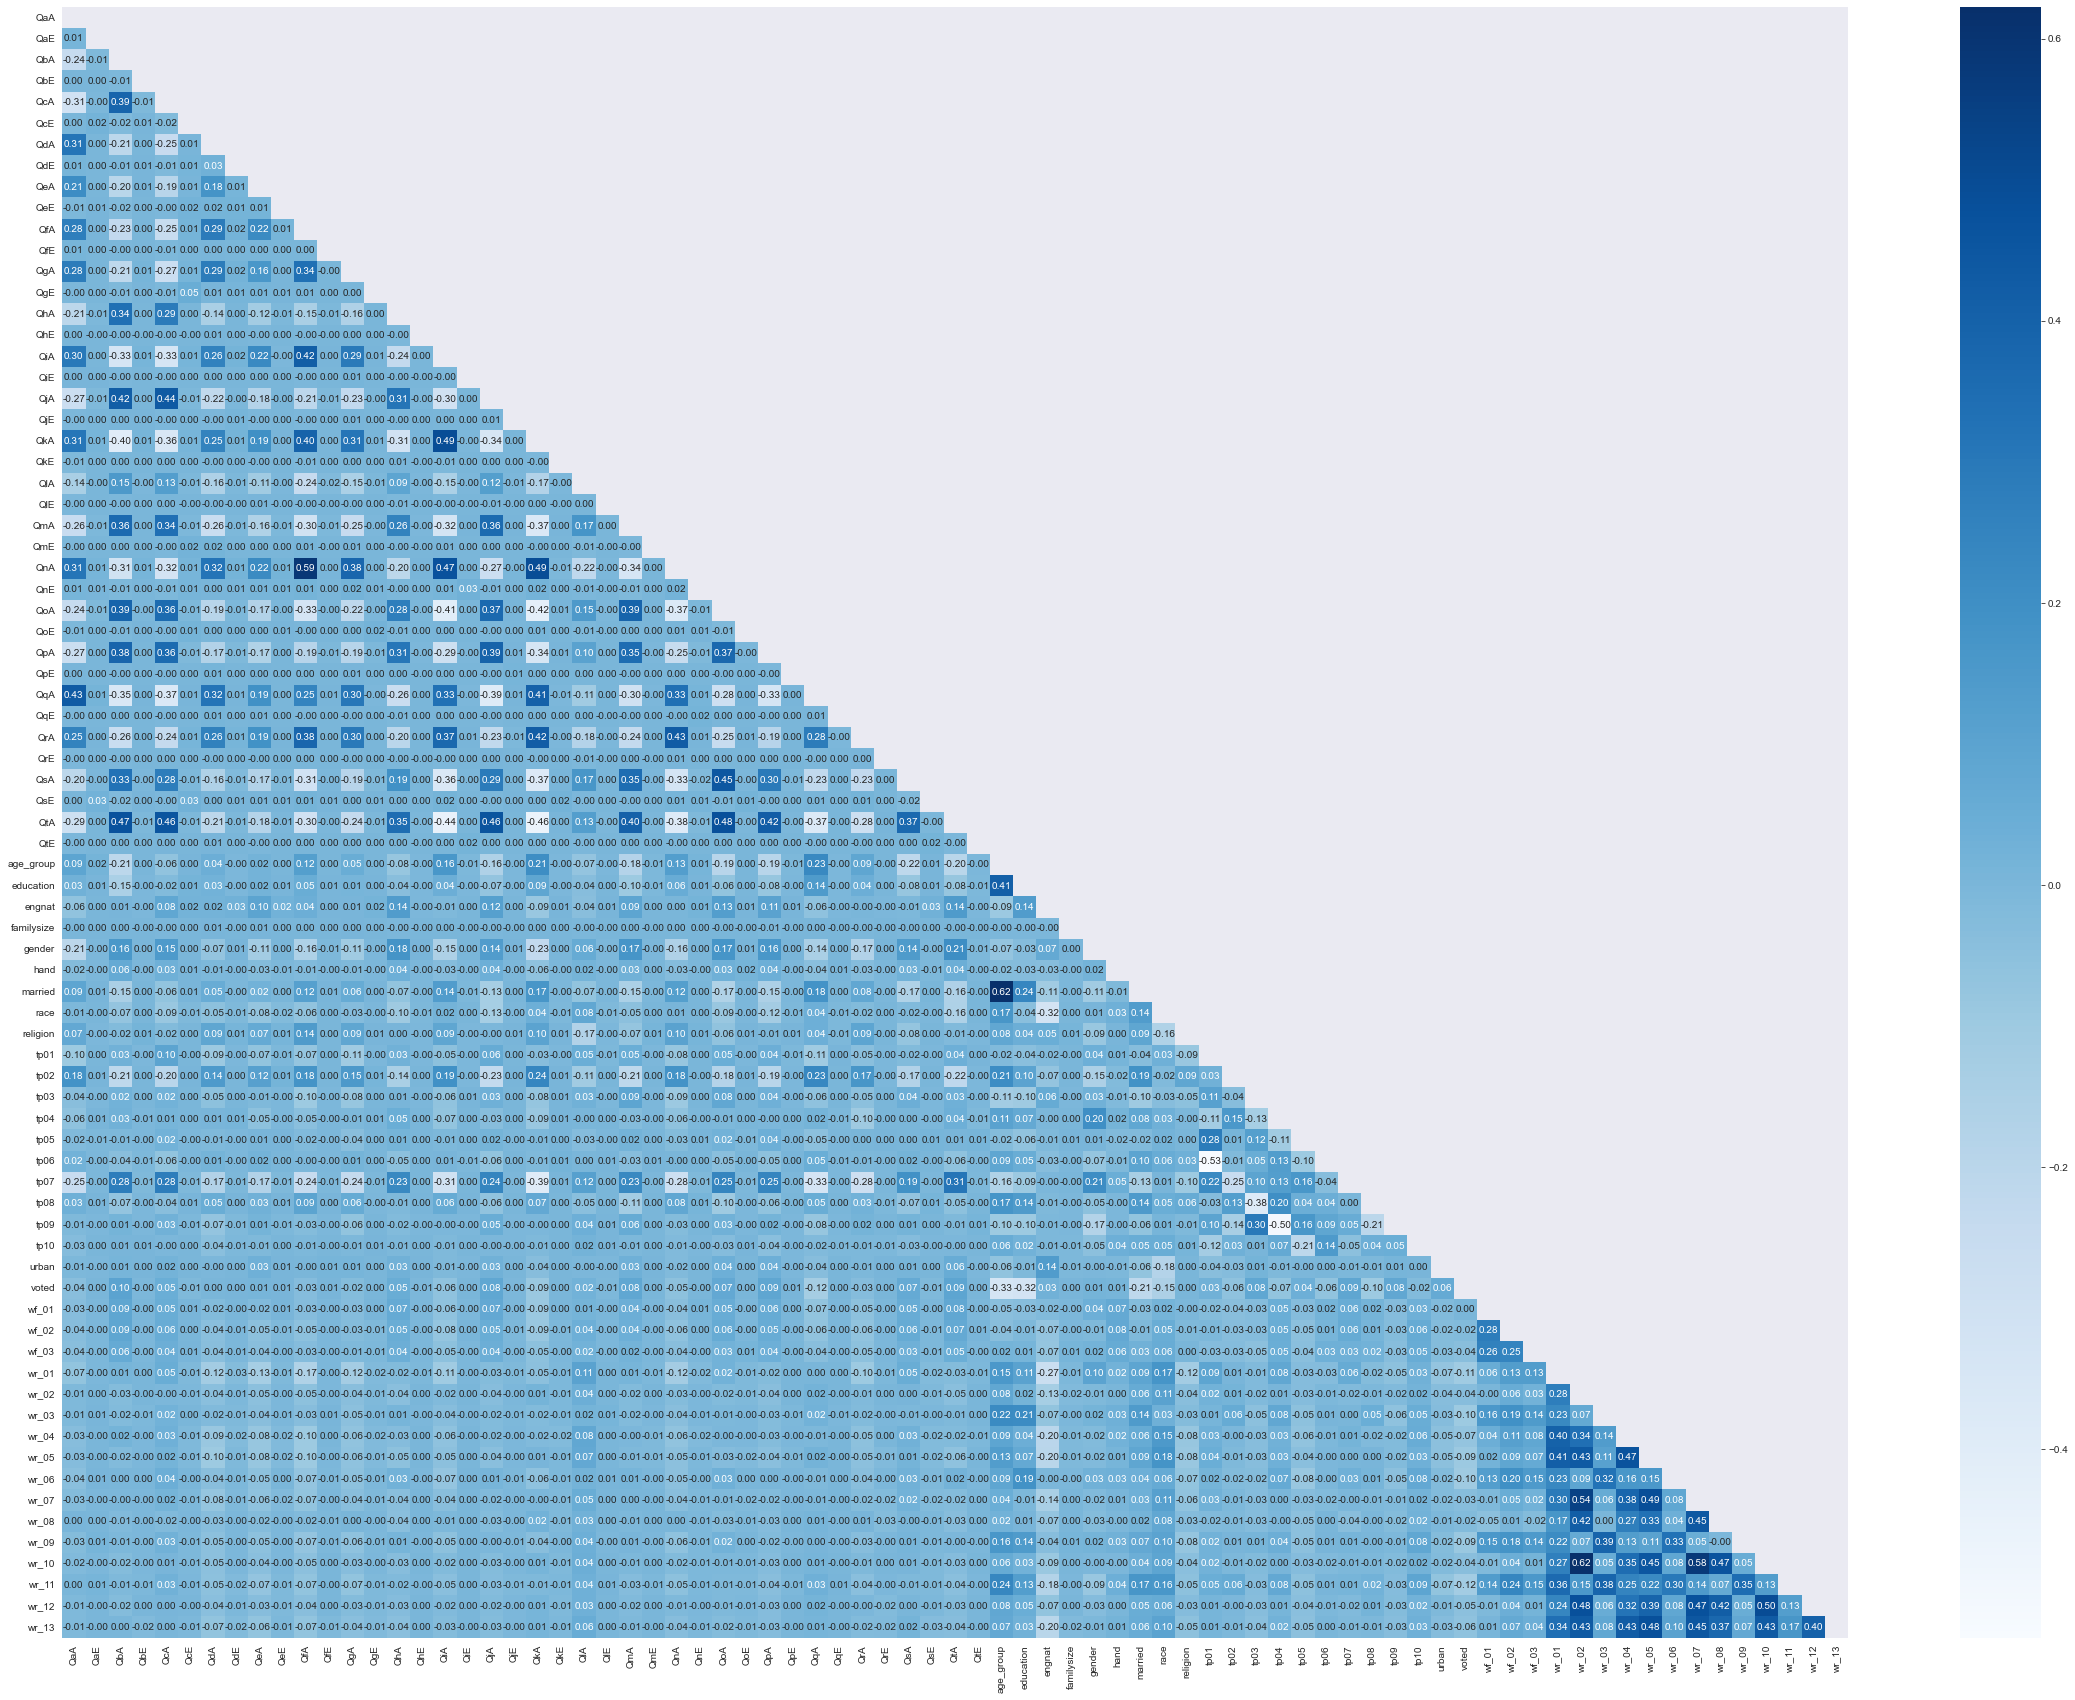

In [10]:
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(40, 30))
sns.heatmap(train.corr(), annot=True, cmap='Blues', fmt='.2f', mask=mask)  #전체의 상관관계 시각화

<AxesSubplot:ylabel='voted'>

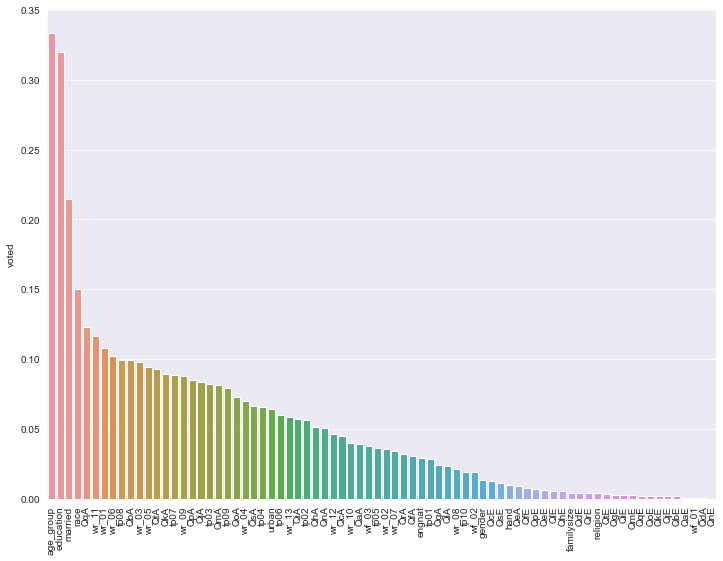

In [11]:
plt.figure(figsize=(12, 9))
plt.xticks(rotation=90)
sns.barplot(x=abs(train.corr()['voted']).sort_values(ascending=False)[1:].index,
            y=abs(train.corr()['voted']).sort_values(ascending=False)[1:])

### 상관계수가 낮은 열 삭제

In [12]:
# train = train.drop(
#     ['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 'QkE', 'QlE', 'QmE', 'QnE', 'QoE',
#      'QpE', 'QqE', 'QrE', 'QsE', 'QtE'], axis=1)
# test = test.drop(
#     ['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 'QkE', 'QlE', 'QmE', 'QnE', 'QoE',
#      'QpE', 'QqE', 'QrE', 'QsE', 'QtE'], axis=1)

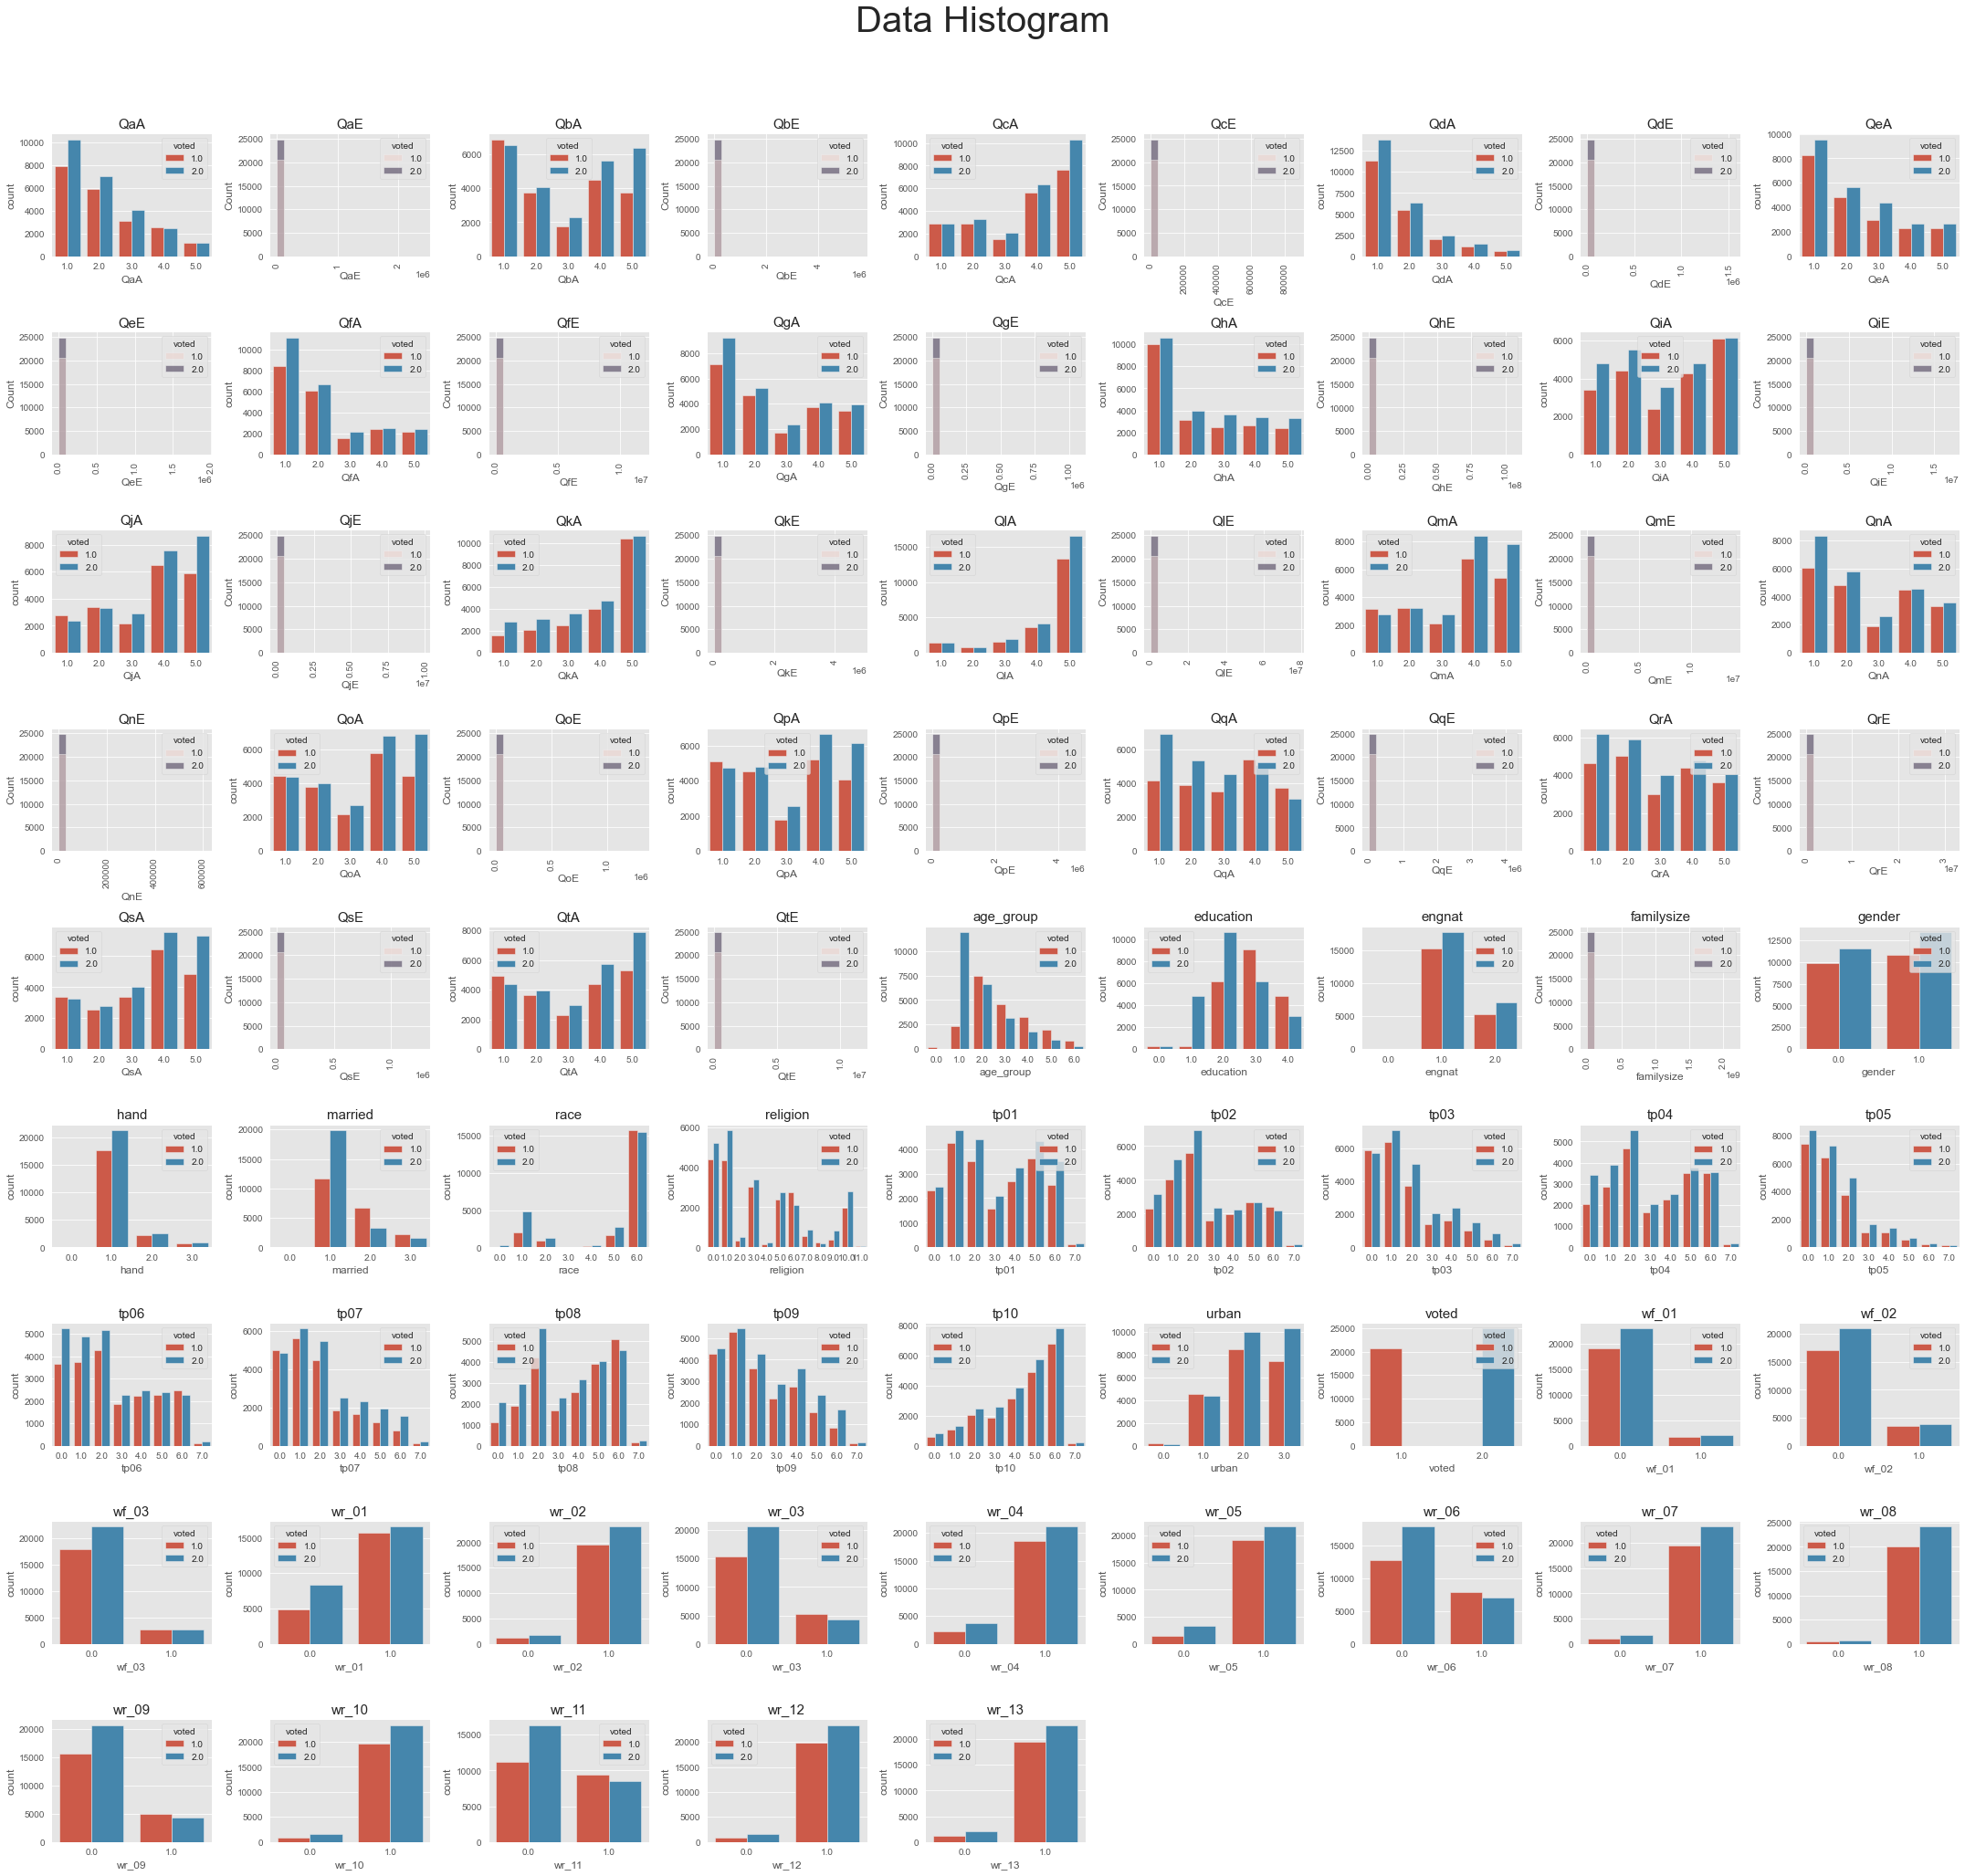

In [13]:
plt.style.use('ggplot')

# 히스토그램을 사용해서 데이터의 분포 살펴보기
plt.figure(figsize=(30, 30))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화
cols = train.columns
for i in range(len(cols)):
    plt.subplot(9, 9, i + 1)  # 최대 5 by 5, 25개의 특징 분포를 확인할 수 있습니다.
    plt.title(cols[i], fontsize=15)  # 각 분포그림의 제목을 특징명으로 설정합니다.
    if len(train[cols[i]].unique()) < 20:  # 해당 특징의 고유한 값 종류가 20개가 넘으면
        sns.countplot(data=train, x=train[cols[i]], hue='voted')  # 연령대별 target 분포
    else:
        plt.xticks(rotation=90)  # x축 text 회전
        sns.histplot(data=train, x=train[cols[i]], hue='voted', bins=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 모델 탐색

In [14]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

In [15]:
submission = pd.read_csv("data/sample_submission.csv")

In [16]:
train.nunique()

QaA         5
QaE      3235
QbA         5
QbE      5835
QcA         5
         ... 
wr_09       2
wr_10       2
wr_11       2
wr_12       2
wr_13       2
Length: 77, dtype: int64

In [17]:
train.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [18]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import LabelEncoder

df = train.drop('voted', axis=1)

nunique = df.nunique()
cols = df.columns

cat_idxs = []
cat_dims = []

for i in range(len(cols)):
    if nunique[cols[i]] < 15:
        enc = LabelEncoder()
        train[cols[i]] = enc.fit_transform(train[cols[i]].values)
        test[cols[i]] = enc.transform(test[cols[i]].values)
        cat_idxs.append(i)
        cat_dims.append(len(enc.classes_))

len(cat_idxs), len(cat_dims)

(55, 55)

In [19]:
from pytorch_tabnet.augmentations import ClassificationSMOTE
from cosine_annealing_warmup import CosineAnnealingWarmupRestarts

In [20]:
X_train = train.drop('voted', axis=1).values
y_train = train['voted'].values - 1
X_test = test.values

In [21]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [22]:
def clf_kfold_optuna(trial: Trial, train):
    TABNET_PARAMS = {
        'n_d': trial.suggest_int('n_d', 8, 64, step=8),
        'n_a': trial.suggest_int('n_a', 8, 64, step=8),
        'n_independent': trial.suggest_int('n_independent', 1, 5),
        'n_shared': trial.suggest_int('n_independent', 1, 5),
        'n_steps': trial.suggest_int('n_independent', 3, 5),
        'cat_idxs': cat_idxs,
        'cat_dims': cat_dims,
        'cat_emb_dim': len(cat_dims),
        'optimizer_fn': torch.optim.RAdam,
        'optimizer_params': {'lr': 0.01,
                             'weight_decay': 0.003
                             },
        'scheduler_fn': CosineAnnealingWarmupRestarts,
        'scheduler_params': {'first_cycle_steps': 200,
                             'cycle_mult': 2.0,
                             'max_lr': 0.01,
                             'min_lr': 0.0001,
                             'warmup_steps': 10,
                             'gamma': 0.5
                             },
        'mask_type': 'entmax',
        'gamma': trial.suggest_float('gamma', 0.9, 1.5, step=0.1),
    }

    cv_accuracy = []
    cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    for t, v in cv.split(train, train['voted']):
        model = TabNetClassifier(**TABNET_PARAMS)

        train_cv = train.iloc[t]  # 훈련용
        val_cv = train.iloc[v]  # 검증용 분리

        X_train = train_cv.drop('voted', axis=1).values
        y_train = train_cv['voted'].values

        X_val = val_cv.drop('voted', axis=1).values
        y_val = val_cv['voted'].values

        FIT_PARAMS = {
            'X_train': X_train,
            'y_train': y_train,
            'eval_set': [(X_val, y_val)],
            'eval_name': ['val'],
            'eval_metric': ['auc'],
            'max_epochs': T_EPOCHS,
            'patience': 100,
            'batch_size': 2048,
            'virtual_batch_size': 256,
            'weights': 1,
            'augmentations': aug
        }

        model.fit(**FIT_PARAMS)

        score = metrics.roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
        cv_accuracy.append(score)

    return np.mean(cv_accuracy)

In [23]:
T_EPOCHS = 500
aug = ClassificationSMOTE(p=0.3)

opt = optuna.create_study(direction='maximize')
opt.optimize(lambda trial: clf_kfold_optuna(trial, train), n_trials=5)

print(f'Best score: {opt.best_trial.value}\nparams: {opt.best_trial.params}')

[I 2022-11-16 22:14:10,438] A new study created in memory with name: no-name-7a7e75b0-5cb6-43e4-9326-b085b0df93d6
C:\Anaconda3\envs\torch_py38\lib\site-packages\optuna\trial\_trial.py:648: RuntimeWarning: Inconsistent parameter values for distribution with name "n_independent"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 1, 'high': 5}
  warnings.warn(
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.94888 | val_auc: 0.50084 |  0:00:02s
epoch 1  | loss: 0.94167 | val_auc: 0.50604 |  0:00:02s
epoch 2  | loss: 0.9166  | val_auc: 0.5085  |  0:00:03s
epoch 3  | loss: 0.87032 | val_auc: 0.51467 |  0:00:04s
epoch 4  | loss: 0.82332 | val_auc: 0.51992 |  0:00:04s
epoch 5  | loss: 0.77346 | val_auc: 0.52826 |  0:00:05s
epoch 6  | loss: 0.73987 | val_auc: 0.54127 |  0:00:06s
epoch 7  | loss: 0.70679 | val_auc: 0.55761 |  0:00:06s
epoch 8  | loss: 0.68473 | val_auc: 0.58129 |  0:00:07s
epoch 9  | loss: 0.66421 | val_auc: 0.63182 |  0:00:08s
epoch 10 | loss: 0.64588 | val_auc: 0.68714 |  0:00:08s
epoch 11 | loss: 0.61583 | val_auc: 0.72274 |  0:00:09s
epoch 12 | loss: 0.59649 | val_auc: 0.73359 |  0:00:10s
epoch 13 | loss: 0.58635 | val_auc: 0.73631 |  0:00:10s
epoch 14 | loss: 0.57998 | val_auc: 0.74316 |  0:00:11s
epoch 15 | loss: 0.57358 | val_auc: 0.74814 |  0:00:12s
epoch 16 | loss: 0.5742  | val_auc: 0.75504 |  0:00:12s
epoch 17 | loss: 0.56903 | val_auc: 0.75748 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.95752 | val_auc: 0.49722 |  0:00:00s
epoch 1  | loss: 0.94057 | val_auc: 0.49719 |  0:00:01s
epoch 2  | loss: 0.91924 | val_auc: 0.4997  |  0:00:01s
epoch 3  | loss: 0.87586 | val_auc: 0.50884 |  0:00:02s
epoch 4  | loss: 0.82755 | val_auc: 0.51816 |  0:00:03s
epoch 5  | loss: 0.77152 | val_auc: 0.52851 |  0:00:03s
epoch 6  | loss: 0.73619 | val_auc: 0.54665 |  0:00:04s
epoch 7  | loss: 0.70542 | val_auc: 0.56935 |  0:00:05s
epoch 8  | loss: 0.68021 | val_auc: 0.59819 |  0:00:05s
epoch 9  | loss: 0.6604  | val_auc: 0.63675 |  0:00:06s
epoch 10 | loss: 0.63485 | val_auc: 0.68129 |  0:00:06s
epoch 11 | loss: 0.61365 | val_auc: 0.70814 |  0:00:07s
epoch 12 | loss: 0.58955 | val_auc: 0.7193  |  0:00:08s
epoch 13 | loss: 0.58192 | val_auc: 0.72418 |  0:00:08s
epoch 14 | loss: 0.57819 | val_auc: 0.73245 |  0:00:09s
epoch 15 | loss: 0.57579 | val_auc: 0.73106 |  0:00:10s
epoch 16 | loss: 0.57567 | val_auc: 0.73898 |  0:00:10s
epoch 17 | loss: 0.57299 | val_auc: 0.74353 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.94725 | val_auc: 0.49968 |  0:00:00s
epoch 1  | loss: 0.93839 | val_auc: 0.49791 |  0:00:01s
epoch 2  | loss: 0.91735 | val_auc: 0.50033 |  0:00:01s
epoch 3  | loss: 0.8675  | val_auc: 0.50613 |  0:00:02s
epoch 4  | loss: 0.81994 | val_auc: 0.51476 |  0:00:03s
epoch 5  | loss: 0.77337 | val_auc: 0.52742 |  0:00:03s
epoch 6  | loss: 0.73916 | val_auc: 0.54678 |  0:00:04s
epoch 7  | loss: 0.70924 | val_auc: 0.56835 |  0:00:05s
epoch 8  | loss: 0.68103 | val_auc: 0.59231 |  0:00:05s
epoch 9  | loss: 0.66079 | val_auc: 0.63187 |  0:00:06s
epoch 10 | loss: 0.64022 | val_auc: 0.66994 |  0:00:07s
epoch 11 | loss: 0.61524 | val_auc: 0.70595 |  0:00:07s
epoch 12 | loss: 0.59712 | val_auc: 0.71506 |  0:00:08s
epoch 13 | loss: 0.58316 | val_auc: 0.72652 |  0:00:09s
epoch 14 | loss: 0.57722 | val_auc: 0.73267 |  0:00:09s
epoch 15 | loss: 0.57563 | val_auc: 0.73708 |  0:00:10s
epoch 16 | loss: 0.56957 | val_auc: 0.74004 |  0:00:10s
epoch 17 | loss: 0.57141 | val_auc: 0.73393 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.94764 | val_auc: 0.49173 |  0:00:00s
epoch 1  | loss: 0.93975 | val_auc: 0.49194 |  0:00:01s
epoch 2  | loss: 0.91762 | val_auc: 0.4941  |  0:00:01s
epoch 3  | loss: 0.86694 | val_auc: 0.50156 |  0:00:02s
epoch 4  | loss: 0.81453 | val_auc: 0.51343 |  0:00:03s
epoch 5  | loss: 0.77313 | val_auc: 0.52866 |  0:00:03s
epoch 6  | loss: 0.73233 | val_auc: 0.5448  |  0:00:04s
epoch 7  | loss: 0.70477 | val_auc: 0.56363 |  0:00:05s
epoch 8  | loss: 0.68042 | val_auc: 0.59023 |  0:00:05s
epoch 9  | loss: 0.65942 | val_auc: 0.63139 |  0:00:06s
epoch 10 | loss: 0.63391 | val_auc: 0.6786  |  0:00:06s
epoch 11 | loss: 0.61077 | val_auc: 0.69966 |  0:00:07s
epoch 12 | loss: 0.59359 | val_auc: 0.71912 |  0:00:08s
epoch 13 | loss: 0.58307 | val_auc: 0.72435 |  0:00:08s
epoch 14 | loss: 0.57335 | val_auc: 0.72159 |  0:00:09s
epoch 15 | loss: 0.57568 | val_auc: 0.73139 |  0:00:10s
epoch 16 | loss: 0.5714  | val_auc: 0.73757 |  0:00:10s
epoch 17 | loss: 0.56982 | val_auc: 0.74013 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.95211 | val_auc: 0.48722 |  0:00:00s
epoch 1  | loss: 0.94797 | val_auc: 0.48691 |  0:00:01s
epoch 2  | loss: 0.91141 | val_auc: 0.49049 |  0:00:01s
epoch 3  | loss: 0.86641 | val_auc: 0.49867 |  0:00:02s
epoch 4  | loss: 0.82215 | val_auc: 0.50765 |  0:00:03s
epoch 5  | loss: 0.78216 | val_auc: 0.5182  |  0:00:03s
epoch 6  | loss: 0.73655 | val_auc: 0.53369 |  0:00:04s
epoch 7  | loss: 0.69955 | val_auc: 0.55599 |  0:00:04s
epoch 8  | loss: 0.68346 | val_auc: 0.57914 |  0:00:05s
epoch 9  | loss: 0.66333 | val_auc: 0.62336 |  0:00:06s
epoch 10 | loss: 0.64553 | val_auc: 0.66438 |  0:00:06s
epoch 11 | loss: 0.61909 | val_auc: 0.69174 |  0:00:07s
epoch 12 | loss: 0.59902 | val_auc: 0.71745 |  0:00:08s
epoch 13 | loss: 0.58368 | val_auc: 0.7236  |  0:00:08s
epoch 14 | loss: 0.57241 | val_auc: 0.73213 |  0:00:09s
epoch 15 | loss: 0.5712  | val_auc: 0.73966 |  0:00:09s
epoch 16 | loss: 0.56665 | val_auc: 0.7331  |  0:00:10s
epoch 17 | loss: 0.57053 | val_auc: 0.74102 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2022-11-16 22:22:45,019] Trial 0 finished with value: 0.766107482885096 and parameters: {'n_d': 64, 'n_a': 16, 'n_independent': 1, 'gamma': 0.9}. Best is trial 0 with value: 0.766107482885096.
C:\Anaconda3\envs\torch_py38\lib\site-packages\optuna\trial\_trial.py:648: RuntimeWarning: Inconsistent parameter values for distribution with name "n_independent"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 1, 'high': 5}
  warnings.warn(
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Devic

epoch 0  | loss: 1.13257 | val_auc: 0.50641 |  0:00:01s
epoch 1  | loss: 1.13175 | val_auc: 0.50543 |  0:00:02s
epoch 2  | loss: 1.11313 | val_auc: 0.51248 |  0:00:04s
epoch 3  | loss: 1.08727 | val_auc: 0.5184  |  0:00:05s
epoch 4  | loss: 1.08913 | val_auc: 0.51781 |  0:00:07s
epoch 5  | loss: 1.06541 | val_auc: 0.5184  |  0:00:08s
epoch 6  | loss: 1.02126 | val_auc: 0.51661 |  0:00:09s
epoch 7  | loss: 0.99423 | val_auc: 0.51355 |  0:00:11s
epoch 8  | loss: 0.96117 | val_auc: 0.50791 |  0:00:12s
epoch 9  | loss: 0.91917 | val_auc: 0.51477 |  0:00:14s
epoch 10 | loss: 0.87795 | val_auc: 0.51646 |  0:00:15s
epoch 11 | loss: 0.82935 | val_auc: 0.52156 |  0:00:16s
epoch 12 | loss: 0.80555 | val_auc: 0.53597 |  0:00:18s
epoch 13 | loss: 0.778   | val_auc: 0.54222 |  0:00:19s
epoch 14 | loss: 0.74826 | val_auc: 0.53515 |  0:00:21s
epoch 15 | loss: 0.73966 | val_auc: 0.54942 |  0:00:22s
epoch 16 | loss: 0.72824 | val_auc: 0.58398 |  0:00:23s
epoch 17 | loss: 0.70764 | val_auc: 0.72019 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.13205 | val_auc: 0.49356 |  0:00:01s
epoch 1  | loss: 1.12227 | val_auc: 0.49468 |  0:00:02s
epoch 2  | loss: 1.10098 | val_auc: 0.4977  |  0:00:04s
epoch 3  | loss: 1.11373 | val_auc: 0.49695 |  0:00:05s
epoch 4  | loss: 1.08077 | val_auc: 0.50416 |  0:00:07s
epoch 5  | loss: 1.04407 | val_auc: 0.50605 |  0:00:08s
epoch 6  | loss: 1.02445 | val_auc: 0.50992 |  0:00:09s
epoch 7  | loss: 0.98704 | val_auc: 0.51564 |  0:00:11s
epoch 8  | loss: 0.95898 | val_auc: 0.51991 |  0:00:12s
epoch 9  | loss: 0.91074 | val_auc: 0.51418 |  0:00:13s
epoch 10 | loss: 0.87575 | val_auc: 0.52411 |  0:00:15s
epoch 11 | loss: 0.83576 | val_auc: 0.52965 |  0:00:16s
epoch 12 | loss: 0.80519 | val_auc: 0.54392 |  0:00:18s
epoch 13 | loss: 0.77409 | val_auc: 0.58175 |  0:00:19s
epoch 14 | loss: 0.74998 | val_auc: 0.58164 |  0:00:20s
epoch 15 | loss: 0.73523 | val_auc: 0.6179  |  0:00:22s
epoch 16 | loss: 0.7126  | val_auc: 0.72906 |  0:00:23s
epoch 17 | loss: 0.66926 | val_auc: 0.73233 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.1378  | val_auc: 0.50884 |  0:00:01s
epoch 1  | loss: 1.14439 | val_auc: 0.51526 |  0:00:02s
epoch 2  | loss: 1.11415 | val_auc: 0.50735 |  0:00:04s
epoch 3  | loss: 1.12298 | val_auc: 0.51323 |  0:00:05s
epoch 4  | loss: 1.08468 | val_auc: 0.51379 |  0:00:07s
epoch 5  | loss: 1.05691 | val_auc: 0.52193 |  0:00:08s
epoch 6  | loss: 1.02975 | val_auc: 0.52513 |  0:00:09s
epoch 7  | loss: 0.99239 | val_auc: 0.53875 |  0:00:11s
epoch 8  | loss: 0.95233 | val_auc: 0.52042 |  0:00:12s
epoch 9  | loss: 0.90972 | val_auc: 0.50906 |  0:00:14s
epoch 10 | loss: 0.8705  | val_auc: 0.51617 |  0:00:15s
epoch 11 | loss: 0.83309 | val_auc: 0.54536 |  0:00:16s
epoch 12 | loss: 0.80173 | val_auc: 0.55534 |  0:00:18s
epoch 13 | loss: 0.77298 | val_auc: 0.54945 |  0:00:19s
epoch 14 | loss: 0.75224 | val_auc: 0.54694 |  0:00:21s
epoch 15 | loss: 0.72893 | val_auc: 0.66071 |  0:00:22s
epoch 16 | loss: 0.70025 | val_auc: 0.73131 |  0:00:23s
epoch 17 | loss: 0.6395  | val_auc: 0.7418  |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.14943 | val_auc: 0.50153 |  0:00:01s
epoch 1  | loss: 1.13452 | val_auc: 0.49557 |  0:00:02s
epoch 2  | loss: 1.12808 | val_auc: 0.49867 |  0:00:04s
epoch 3  | loss: 1.11152 | val_auc: 0.50939 |  0:00:05s
epoch 4  | loss: 1.09045 | val_auc: 0.50836 |  0:00:07s
epoch 5  | loss: 1.05372 | val_auc: 0.51283 |  0:00:08s
epoch 6  | loss: 1.02713 | val_auc: 0.51433 |  0:00:09s
epoch 7  | loss: 1.00799 | val_auc: 0.51696 |  0:00:11s
epoch 8  | loss: 0.95251 | val_auc: 0.5224  |  0:00:12s
epoch 9  | loss: 0.90362 | val_auc: 0.53428 |  0:00:14s
epoch 10 | loss: 0.87319 | val_auc: 0.52445 |  0:00:15s
epoch 11 | loss: 0.84169 | val_auc: 0.52097 |  0:00:16s
epoch 12 | loss: 0.80922 | val_auc: 0.55021 |  0:00:18s
epoch 13 | loss: 0.76924 | val_auc: 0.55596 |  0:00:19s
epoch 14 | loss: 0.75624 | val_auc: 0.57026 |  0:00:21s
epoch 15 | loss: 0.73716 | val_auc: 0.63374 |  0:00:22s
epoch 16 | loss: 0.72474 | val_auc: 0.71142 |  0:00:23s
epoch 17 | loss: 0.68131 | val_auc: 0.71663 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.1398  | val_auc: 0.51332 |  0:00:01s
epoch 1  | loss: 1.14036 | val_auc: 0.50815 |  0:00:02s
epoch 2  | loss: 1.12217 | val_auc: 0.50481 |  0:00:04s
epoch 3  | loss: 1.10612 | val_auc: 0.50708 |  0:00:05s
epoch 4  | loss: 1.06925 | val_auc: 0.50977 |  0:00:07s
epoch 5  | loss: 1.06701 | val_auc: 0.50945 |  0:00:08s
epoch 6  | loss: 1.03056 | val_auc: 0.51519 |  0:00:09s
epoch 7  | loss: 0.9949  | val_auc: 0.51146 |  0:00:11s
epoch 8  | loss: 0.96226 | val_auc: 0.51178 |  0:00:12s
epoch 9  | loss: 0.89602 | val_auc: 0.50878 |  0:00:14s
epoch 10 | loss: 0.86808 | val_auc: 0.51357 |  0:00:15s
epoch 11 | loss: 0.83778 | val_auc: 0.53386 |  0:00:16s
epoch 12 | loss: 0.80985 | val_auc: 0.5351  |  0:00:18s
epoch 13 | loss: 0.77641 | val_auc: 0.5471  |  0:00:19s
epoch 14 | loss: 0.75108 | val_auc: 0.59634 |  0:00:21s
epoch 15 | loss: 0.7359  | val_auc: 0.59827 |  0:00:22s
epoch 16 | loss: 0.71393 | val_auc: 0.65966 |  0:00:23s
epoch 17 | loss: 0.68263 | val_auc: 0.73961 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2022-11-16 22:48:05,370] Trial 1 finished with value: 0.7677234064979334 and parameters: {'n_d': 16, 'n_a': 40, 'n_independent': 4, 'gamma': 1.1}. Best is trial 1 with value: 0.7677234064979334.
C:\Anaconda3\envs\torch_py38\lib\site-packages\optuna\trial\_trial.py:648: RuntimeWarning: Inconsistent parameter values for distribution with name "n_independent"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 1, 'high': 5}
  warnings.warn(
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Dev

epoch 0  | loss: 1.16873 | val_auc: 0.48512 |  0:00:01s
epoch 1  | loss: 1.16927 | val_auc: 0.50092 |  0:00:03s
epoch 2  | loss: 1.15765 | val_auc: 0.50045 |  0:00:05s
epoch 3  | loss: 1.14192 | val_auc: 0.49289 |  0:00:07s
epoch 4  | loss: 1.12182 | val_auc: 0.48841 |  0:00:09s
epoch 5  | loss: 1.08458 | val_auc: 0.48897 |  0:00:10s
epoch 6  | loss: 1.06463 | val_auc: 0.49856 |  0:00:12s
epoch 7  | loss: 1.02246 | val_auc: 0.48981 |  0:00:14s
epoch 8  | loss: 0.9723  | val_auc: 0.4956  |  0:00:16s
epoch 9  | loss: 0.94234 | val_auc: 0.49586 |  0:00:18s
epoch 10 | loss: 0.89224 | val_auc: 0.53472 |  0:00:20s
epoch 11 | loss: 0.87605 | val_auc: 0.51917 |  0:00:22s
epoch 12 | loss: 0.83757 | val_auc: 0.4857  |  0:00:24s
epoch 13 | loss: 0.82164 | val_auc: 0.47448 |  0:00:25s
epoch 14 | loss: 0.79505 | val_auc: 0.45285 |  0:00:27s
epoch 15 | loss: 0.77167 | val_auc: 0.44182 |  0:00:29s
epoch 16 | loss: 0.76671 | val_auc: 0.46019 |  0:00:31s
epoch 17 | loss: 0.74435 | val_auc: 0.52608 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.1723  | val_auc: 0.47748 |  0:00:01s
epoch 1  | loss: 1.1596  | val_auc: 0.48492 |  0:00:03s
epoch 2  | loss: 1.17327 | val_auc: 0.48519 |  0:00:05s
epoch 3  | loss: 1.14641 | val_auc: 0.49323 |  0:00:07s
epoch 4  | loss: 1.12919 | val_auc: 0.48629 |  0:00:09s
epoch 5  | loss: 1.08361 | val_auc: 0.49349 |  0:00:10s
epoch 6  | loss: 1.06365 | val_auc: 0.48524 |  0:00:12s
epoch 7  | loss: 1.02581 | val_auc: 0.49342 |  0:00:14s
epoch 8  | loss: 0.98674 | val_auc: 0.48805 |  0:00:16s
epoch 9  | loss: 0.94976 | val_auc: 0.49372 |  0:00:18s
epoch 10 | loss: 0.89782 | val_auc: 0.50021 |  0:00:19s
epoch 11 | loss: 0.86761 | val_auc: 0.50119 |  0:00:21s
epoch 12 | loss: 0.85108 | val_auc: 0.48635 |  0:00:23s
epoch 13 | loss: 0.82352 | val_auc: 0.48124 |  0:00:25s
epoch 14 | loss: 0.78857 | val_auc: 0.50264 |  0:00:27s
epoch 15 | loss: 0.77768 | val_auc: 0.49354 |  0:00:28s
epoch 16 | loss: 0.75029 | val_auc: 0.53553 |  0:00:30s
epoch 17 | loss: 0.73128 | val_auc: 0.50586 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.17813 | val_auc: 0.47636 |  0:00:01s
epoch 1  | loss: 1.16779 | val_auc: 0.48272 |  0:00:03s
epoch 2  | loss: 1.15548 | val_auc: 0.49004 |  0:00:05s
epoch 3  | loss: 1.14773 | val_auc: 0.49077 |  0:00:07s
epoch 4  | loss: 1.12441 | val_auc: 0.48848 |  0:00:08s
epoch 5  | loss: 1.08535 | val_auc: 0.49152 |  0:00:10s
epoch 6  | loss: 1.05954 | val_auc: 0.48554 |  0:00:12s
epoch 7  | loss: 1.0252  | val_auc: 0.48318 |  0:00:14s
epoch 8  | loss: 0.98063 | val_auc: 0.49412 |  0:00:16s
epoch 9  | loss: 0.93713 | val_auc: 0.48228 |  0:00:18s
epoch 10 | loss: 0.89969 | val_auc: 0.46687 |  0:00:19s
epoch 11 | loss: 0.88034 | val_auc: 0.4712  |  0:00:21s
epoch 12 | loss: 0.84119 | val_auc: 0.49129 |  0:00:23s
epoch 13 | loss: 0.81291 | val_auc: 0.52707 |  0:00:25s
epoch 14 | loss: 0.78838 | val_auc: 0.52591 |  0:00:27s
epoch 15 | loss: 0.77104 | val_auc: 0.52625 |  0:00:28s
epoch 16 | loss: 0.74833 | val_auc: 0.52828 |  0:00:30s
epoch 17 | loss: 0.72148 | val_auc: 0.55218 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.16707 | val_auc: 0.48455 |  0:00:01s
epoch 1  | loss: 1.15588 | val_auc: 0.48519 |  0:00:03s
epoch 2  | loss: 1.15943 | val_auc: 0.49658 |  0:00:05s
epoch 3  | loss: 1.16958 | val_auc: 0.49158 |  0:00:07s
epoch 4  | loss: 1.10606 | val_auc: 0.49915 |  0:00:08s
epoch 5  | loss: 1.10578 | val_auc: 0.4951  |  0:00:10s
epoch 6  | loss: 1.0599  | val_auc: 0.50936 |  0:00:12s
epoch 7  | loss: 1.03169 | val_auc: 0.51065 |  0:00:14s
epoch 8  | loss: 0.98905 | val_auc: 0.51226 |  0:00:15s
epoch 9  | loss: 0.93682 | val_auc: 0.497   |  0:00:17s
epoch 10 | loss: 0.92004 | val_auc: 0.47635 |  0:00:19s
epoch 11 | loss: 0.8826  | val_auc: 0.48382 |  0:00:21s
epoch 12 | loss: 0.83884 | val_auc: 0.49645 |  0:00:23s
epoch 13 | loss: 0.82171 | val_auc: 0.52128 |  0:00:24s
epoch 14 | loss: 0.7906  | val_auc: 0.51244 |  0:00:26s
epoch 15 | loss: 0.77454 | val_auc: 0.51136 |  0:00:28s
epoch 16 | loss: 0.75228 | val_auc: 0.52753 |  0:00:30s
epoch 17 | loss: 0.72972 | val_auc: 0.5361  |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.18578 | val_auc: 0.4748  |  0:00:01s
epoch 1  | loss: 1.17367 | val_auc: 0.48031 |  0:00:03s
epoch 2  | loss: 1.15728 | val_auc: 0.48812 |  0:00:05s
epoch 3  | loss: 1.15858 | val_auc: 0.49668 |  0:00:07s
epoch 4  | loss: 1.13068 | val_auc: 0.49143 |  0:00:08s
epoch 5  | loss: 1.09127 | val_auc: 0.4908  |  0:00:10s
epoch 6  | loss: 1.05759 | val_auc: 0.48511 |  0:00:12s
epoch 7  | loss: 1.02728 | val_auc: 0.48113 |  0:00:14s
epoch 8  | loss: 0.97854 | val_auc: 0.49359 |  0:00:15s
epoch 9  | loss: 0.9465  | val_auc: 0.49472 |  0:00:17s
epoch 10 | loss: 0.91113 | val_auc: 0.49708 |  0:00:19s
epoch 11 | loss: 0.87475 | val_auc: 0.51344 |  0:00:21s
epoch 12 | loss: 0.84221 | val_auc: 0.54085 |  0:00:22s
epoch 13 | loss: 0.80839 | val_auc: 0.52021 |  0:00:24s
epoch 14 | loss: 0.79635 | val_auc: 0.51198 |  0:00:26s
epoch 15 | loss: 0.78718 | val_auc: 0.49309 |  0:00:28s
epoch 16 | loss: 0.76563 | val_auc: 0.49445 |  0:00:30s
epoch 17 | loss: 0.74903 | val_auc: 0.44094 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2022-11-16 23:39:06,902] Trial 2 finished with value: 0.7677080066905503 and parameters: {'n_d': 48, 'n_a': 8, 'n_independent': 5, 'gamma': 1.3}. Best is trial 1 with value: 0.7677234064979334.
C:\Anaconda3\envs\torch_py38\lib\site-packages\optuna\trial\_trial.py:648: RuntimeWarning: Inconsistent parameter values for distribution with name "n_independent"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 1, 'high': 5}
  warnings.warn(
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Devi

epoch 0  | loss: 1.72466 | val_auc: 0.48638 |  0:00:01s
epoch 1  | loss: 1.73453 | val_auc: 0.49079 |  0:00:03s
epoch 2  | loss: 1.70231 | val_auc: 0.50017 |  0:00:05s
epoch 3  | loss: 1.67297 | val_auc: 0.50267 |  0:00:07s
epoch 4  | loss: 1.6314  | val_auc: 0.49893 |  0:00:09s
epoch 5  | loss: 1.57634 | val_auc: 0.50659 |  0:00:10s
epoch 6  | loss: 1.48937 | val_auc: 0.50562 |  0:00:12s
epoch 7  | loss: 1.37423 | val_auc: 0.50717 |  0:00:14s
epoch 8  | loss: 1.28434 | val_auc: 0.49583 |  0:00:16s
epoch 9  | loss: 1.18462 | val_auc: 0.49826 |  0:00:18s
epoch 10 | loss: 1.07013 | val_auc: 0.5218  |  0:00:19s
epoch 11 | loss: 0.99934 | val_auc: 0.52725 |  0:00:21s
epoch 12 | loss: 0.92228 | val_auc: 0.5515  |  0:00:23s
epoch 13 | loss: 0.86832 | val_auc: 0.55166 |  0:00:25s
epoch 14 | loss: 0.82193 | val_auc: 0.53274 |  0:00:27s
epoch 15 | loss: 0.78146 | val_auc: 0.51986 |  0:00:28s
epoch 16 | loss: 0.75979 | val_auc: 0.54409 |  0:00:30s
epoch 17 | loss: 0.72811 | val_auc: 0.58793 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.74609 | val_auc: 0.4859  |  0:00:01s
epoch 1  | loss: 1.70362 | val_auc: 0.49195 |  0:00:03s
epoch 2  | loss: 1.71481 | val_auc: 0.48965 |  0:00:05s
epoch 3  | loss: 1.68127 | val_auc: 0.49189 |  0:00:07s
epoch 4  | loss: 1.62852 | val_auc: 0.50349 |  0:00:09s
epoch 5  | loss: 1.54642 | val_auc: 0.50764 |  0:00:11s
epoch 6  | loss: 1.47811 | val_auc: 0.49092 |  0:00:12s
epoch 7  | loss: 1.38895 | val_auc: 0.50121 |  0:00:14s
epoch 8  | loss: 1.30108 | val_auc: 0.50597 |  0:00:16s
epoch 9  | loss: 1.19331 | val_auc: 0.47754 |  0:00:18s
epoch 10 | loss: 1.10438 | val_auc: 0.48077 |  0:00:20s
epoch 11 | loss: 1.02308 | val_auc: 0.47247 |  0:00:21s
epoch 12 | loss: 0.94622 | val_auc: 0.46939 |  0:00:23s
epoch 13 | loss: 0.87605 | val_auc: 0.46935 |  0:00:25s
epoch 14 | loss: 0.833   | val_auc: 0.46003 |  0:00:27s
epoch 15 | loss: 0.79045 | val_auc: 0.45667 |  0:00:28s
epoch 16 | loss: 0.7624  | val_auc: 0.47772 |  0:00:30s
epoch 17 | loss: 0.73341 | val_auc: 0.55731 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.74409 | val_auc: 0.48853 |  0:00:01s
epoch 1  | loss: 1.72697 | val_auc: 0.49224 |  0:00:03s
epoch 2  | loss: 1.68126 | val_auc: 0.50171 |  0:00:05s
epoch 3  | loss: 1.69087 | val_auc: 0.50031 |  0:00:07s
epoch 4  | loss: 1.613   | val_auc: 0.50033 |  0:00:08s
epoch 5  | loss: 1.52733 | val_auc: 0.49463 |  0:00:10s
epoch 6  | loss: 1.46009 | val_auc: 0.48969 |  0:00:12s
epoch 7  | loss: 1.39531 | val_auc: 0.49511 |  0:00:14s
epoch 8  | loss: 1.29482 | val_auc: 0.49241 |  0:00:16s
epoch 9  | loss: 1.18282 | val_auc: 0.50919 |  0:00:17s
epoch 10 | loss: 1.10162 | val_auc: 0.50921 |  0:00:19s
epoch 11 | loss: 1.02337 | val_auc: 0.51362 |  0:00:21s
epoch 12 | loss: 0.94998 | val_auc: 0.47979 |  0:00:23s
epoch 13 | loss: 0.8904  | val_auc: 0.49883 |  0:00:25s
epoch 14 | loss: 0.85139 | val_auc: 0.50852 |  0:00:26s
epoch 15 | loss: 0.80081 | val_auc: 0.52945 |  0:00:28s
epoch 16 | loss: 0.76479 | val_auc: 0.58035 |  0:00:30s
epoch 17 | loss: 0.72747 | val_auc: 0.59474 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.74853 | val_auc: 0.47745 |  0:00:01s
epoch 1  | loss: 1.71566 | val_auc: 0.48336 |  0:00:03s
epoch 2  | loss: 1.69679 | val_auc: 0.48485 |  0:00:05s
epoch 3  | loss: 1.69273 | val_auc: 0.48192 |  0:00:06s
epoch 4  | loss: 1.59922 | val_auc: 0.48211 |  0:00:08s
epoch 5  | loss: 1.5619  | val_auc: 0.49041 |  0:00:10s
epoch 6  | loss: 1.46793 | val_auc: 0.50622 |  0:00:12s
epoch 7  | loss: 1.35385 | val_auc: 0.49544 |  0:00:14s
epoch 8  | loss: 1.29181 | val_auc: 0.50321 |  0:00:15s
epoch 9  | loss: 1.19801 | val_auc: 0.51324 |  0:00:17s
epoch 10 | loss: 1.08379 | val_auc: 0.52958 |  0:00:19s
epoch 11 | loss: 1.00255 | val_auc: 0.55073 |  0:00:21s
epoch 12 | loss: 0.93996 | val_auc: 0.55728 |  0:00:22s
epoch 13 | loss: 0.86885 | val_auc: 0.55633 |  0:00:24s
epoch 14 | loss: 0.8299  | val_auc: 0.58312 |  0:00:26s
epoch 15 | loss: 0.78774 | val_auc: 0.56858 |  0:00:28s
epoch 16 | loss: 0.75413 | val_auc: 0.54338 |  0:00:29s
epoch 17 | loss: 0.7282  | val_auc: 0.5118  |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.72768 | val_auc: 0.4821  |  0:00:01s
epoch 1  | loss: 1.73131 | val_auc: 0.48179 |  0:00:03s
epoch 2  | loss: 1.70862 | val_auc: 0.48556 |  0:00:05s
epoch 3  | loss: 1.66235 | val_auc: 0.48925 |  0:00:06s
epoch 4  | loss: 1.632   | val_auc: 0.49266 |  0:00:08s
epoch 5  | loss: 1.55496 | val_auc: 0.49942 |  0:00:10s
epoch 6  | loss: 1.48258 | val_auc: 0.4995  |  0:00:12s
epoch 7  | loss: 1.36311 | val_auc: 0.48861 |  0:00:13s
epoch 8  | loss: 1.26634 | val_auc: 0.4944  |  0:00:15s
epoch 9  | loss: 1.18366 | val_auc: 0.49998 |  0:00:17s
epoch 10 | loss: 1.08916 | val_auc: 0.52832 |  0:00:19s
epoch 11 | loss: 1.00301 | val_auc: 0.54369 |  0:00:20s
epoch 12 | loss: 0.92515 | val_auc: 0.55869 |  0:00:22s
epoch 13 | loss: 0.87448 | val_auc: 0.56021 |  0:00:24s
epoch 14 | loss: 0.81555 | val_auc: 0.57975 |  0:00:26s
epoch 15 | loss: 0.79147 | val_auc: 0.58072 |  0:00:27s
epoch 16 | loss: 0.76335 | val_auc: 0.55958 |  0:00:29s
epoch 17 | loss: 0.73036 | val_auc: 0.5633  |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2022-11-17 00:22:45,223] Trial 3 finished with value: 0.7677039655690809 and parameters: {'n_d': 8, 'n_a': 64, 'n_independent': 5, 'gamma': 1.0}. Best is trial 1 with value: 0.7677234064979334.
C:\Anaconda3\envs\torch_py38\lib\site-packages\optuna\trial\_trial.py:648: RuntimeWarning: Inconsistent parameter values for distribution with name "n_independent"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 1, 'high': 5}
  warnings.warn(
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Devi

epoch 0  | loss: 1.22696 | val_auc: 0.50099 |  0:00:01s
epoch 1  | loss: 1.20971 | val_auc: 0.49481 |  0:00:02s
epoch 2  | loss: 1.15341 | val_auc: 0.49459 |  0:00:04s
epoch 3  | loss: 1.09505 | val_auc: 0.48868 |  0:00:05s
epoch 4  | loss: 1.02441 | val_auc: 0.48506 |  0:00:06s
epoch 5  | loss: 0.95651 | val_auc: 0.48896 |  0:00:08s
epoch 6  | loss: 0.90381 | val_auc: 0.48902 |  0:00:09s
epoch 7  | loss: 0.86271 | val_auc: 0.49665 |  0:00:11s
epoch 8  | loss: 0.83027 | val_auc: 0.48766 |  0:00:12s
epoch 9  | loss: 0.79945 | val_auc: 0.48128 |  0:00:13s
epoch 10 | loss: 0.7696  | val_auc: 0.48713 |  0:00:15s
epoch 11 | loss: 0.74672 | val_auc: 0.49639 |  0:00:16s
epoch 12 | loss: 0.72639 | val_auc: 0.53651 |  0:00:18s
epoch 13 | loss: 0.71173 | val_auc: 0.58228 |  0:00:19s
epoch 14 | loss: 0.70742 | val_auc: 0.60002 |  0:00:20s
epoch 15 | loss: 0.70242 | val_auc: 0.6296  |  0:00:22s
epoch 16 | loss: 0.69803 | val_auc: 0.71777 |  0:00:23s
epoch 17 | loss: 0.68226 | val_auc: 0.70519 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.20888 | val_auc: 0.48951 |  0:00:01s
epoch 1  | loss: 1.20297 | val_auc: 0.4907  |  0:00:02s
epoch 2  | loss: 1.14444 | val_auc: 0.49206 |  0:00:04s
epoch 3  | loss: 1.09421 | val_auc: 0.48697 |  0:00:05s
epoch 4  | loss: 1.01244 | val_auc: 0.48926 |  0:00:07s
epoch 5  | loss: 0.94847 | val_auc: 0.49636 |  0:00:08s
epoch 6  | loss: 0.90048 | val_auc: 0.48315 |  0:00:09s
epoch 7  | loss: 0.87501 | val_auc: 0.4849  |  0:00:11s
epoch 8  | loss: 0.8294  | val_auc: 0.49353 |  0:00:12s
epoch 9  | loss: 0.80485 | val_auc: 0.47125 |  0:00:13s
epoch 10 | loss: 0.77574 | val_auc: 0.47351 |  0:00:15s
epoch 11 | loss: 0.74356 | val_auc: 0.48531 |  0:00:16s
epoch 12 | loss: 0.73036 | val_auc: 0.49113 |  0:00:18s
epoch 13 | loss: 0.71818 | val_auc: 0.51797 |  0:00:19s
epoch 14 | loss: 0.7073  | val_auc: 0.55216 |  0:00:20s
epoch 15 | loss: 0.70098 | val_auc: 0.61831 |  0:00:22s
epoch 16 | loss: 0.69812 | val_auc: 0.69832 |  0:00:23s
epoch 17 | loss: 0.6803  | val_auc: 0.7069  |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.21187 | val_auc: 0.50516 |  0:00:01s
epoch 1  | loss: 1.20055 | val_auc: 0.50733 |  0:00:02s
epoch 2  | loss: 1.16345 | val_auc: 0.51175 |  0:00:04s
epoch 3  | loss: 1.10426 | val_auc: 0.50345 |  0:00:05s
epoch 4  | loss: 1.01682 | val_auc: 0.50787 |  0:00:06s
epoch 5  | loss: 0.95144 | val_auc: 0.50697 |  0:00:08s
epoch 6  | loss: 0.91125 | val_auc: 0.49969 |  0:00:09s
epoch 7  | loss: 0.86787 | val_auc: 0.49718 |  0:00:11s
epoch 8  | loss: 0.82917 | val_auc: 0.51133 |  0:00:12s
epoch 9  | loss: 0.78986 | val_auc: 0.49779 |  0:00:13s
epoch 10 | loss: 0.75974 | val_auc: 0.51385 |  0:00:15s
epoch 11 | loss: 0.74341 | val_auc: 0.52156 |  0:00:16s
epoch 12 | loss: 0.72635 | val_auc: 0.53034 |  0:00:18s
epoch 13 | loss: 0.71476 | val_auc: 0.5606  |  0:00:19s
epoch 14 | loss: 0.70741 | val_auc: 0.57804 |  0:00:20s
epoch 15 | loss: 0.7052  | val_auc: 0.60815 |  0:00:22s
epoch 16 | loss: 0.69962 | val_auc: 0.68524 |  0:00:23s
epoch 17 | loss: 0.68749 | val_auc: 0.73501 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.20962 | val_auc: 0.48986 |  0:00:01s
epoch 1  | loss: 1.20939 | val_auc: 0.49873 |  0:00:02s
epoch 2  | loss: 1.17215 | val_auc: 0.49971 |  0:00:04s
epoch 3  | loss: 1.1066  | val_auc: 0.50047 |  0:00:05s
epoch 4  | loss: 1.03691 | val_auc: 0.49809 |  0:00:06s
epoch 5  | loss: 0.97376 | val_auc: 0.49911 |  0:00:08s
epoch 6  | loss: 0.90922 | val_auc: 0.48404 |  0:00:09s
epoch 7  | loss: 0.86612 | val_auc: 0.47487 |  0:00:11s
epoch 8  | loss: 0.83003 | val_auc: 0.47552 |  0:00:12s
epoch 9  | loss: 0.7964  | val_auc: 0.48852 |  0:00:13s
epoch 10 | loss: 0.76244 | val_auc: 0.4886  |  0:00:15s
epoch 11 | loss: 0.73912 | val_auc: 0.53183 |  0:00:16s
epoch 12 | loss: 0.72146 | val_auc: 0.53991 |  0:00:18s
epoch 13 | loss: 0.71231 | val_auc: 0.57717 |  0:00:19s
epoch 14 | loss: 0.70694 | val_auc: 0.59273 |  0:00:20s
epoch 15 | loss: 0.69977 | val_auc: 0.64698 |  0:00:22s
epoch 16 | loss: 0.6938  | val_auc: 0.6967  |  0:00:23s
epoch 17 | loss: 0.66596 | val_auc: 0.71116 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.21097 | val_auc: 0.50208 |  0:00:01s
epoch 1  | loss: 1.20883 | val_auc: 0.49384 |  0:00:02s
epoch 2  | loss: 1.16424 | val_auc: 0.49731 |  0:00:04s
epoch 3  | loss: 1.10631 | val_auc: 0.50143 |  0:00:05s
epoch 4  | loss: 1.02342 | val_auc: 0.50337 |  0:00:06s
epoch 5  | loss: 0.95106 | val_auc: 0.49222 |  0:00:08s
epoch 6  | loss: 0.89447 | val_auc: 0.4909  |  0:00:09s
epoch 7  | loss: 0.85482 | val_auc: 0.48237 |  0:00:11s
epoch 8  | loss: 0.83291 | val_auc: 0.50413 |  0:00:12s
epoch 9  | loss: 0.78695 | val_auc: 0.4845  |  0:00:13s
epoch 10 | loss: 0.76677 | val_auc: 0.49421 |  0:00:15s
epoch 11 | loss: 0.74484 | val_auc: 0.49743 |  0:00:16s
epoch 12 | loss: 0.72718 | val_auc: 0.52674 |  0:00:18s
epoch 13 | loss: 0.71423 | val_auc: 0.54634 |  0:00:19s
epoch 14 | loss: 0.70835 | val_auc: 0.56151 |  0:00:20s
epoch 15 | loss: 0.70341 | val_auc: 0.57408 |  0:00:22s
epoch 16 | loss: 0.70029 | val_auc: 0.60702 |  0:00:23s
epoch 17 | loss: 0.69501 | val_auc: 0.71105 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2022-11-17 00:53:56,886] Trial 4 finished with value: 0.7683878041357165 and parameters: {'n_d': 24, 'n_a': 64, 'n_independent': 4, 'gamma': 1.3}. Best is trial 4 with value: 0.7683878041357165.


Best score: 0.7683878041357165
params: {'n_d': 24, 'n_a': 64, 'n_independent': 4, 'gamma': 1.3}


In [24]:
FIT_PARAMS = {
    'X_train': X_train,
    'y_train': y_train,
    'eval_set': [(X_train, y_train)],
    'eval_name': ['val'],
    'eval_metric': ['auc'],
    'max_epochs': T_EPOCHS,
    'patience': 100,
    'batch_size': 2048,
    'virtual_batch_size': 256,
    'weights': 1,
    'augmentations': aug
}

In [25]:
opt.best_params

{'n_d': 24, 'n_a': 64, 'n_independent': 4, 'gamma': 1.3}

In [28]:
TABNET_PARAMS = {
    'n_d': 24,
    'n_a': 64,
    'n_independent': 4,
    'n_shared': 5,
    'n_steps': 3,
    'cat_idxs': cat_idxs,
    'cat_dims': cat_dims,
    'cat_emb_dim': len(cat_dims),
    'optimizer_fn': torch.optim.RAdam,
    'optimizer_params': {'lr': 0.01,
                         'weight_decay': 0.003
                         },
    'scheduler_fn': CosineAnnealingWarmupRestarts,
    'scheduler_params': {'first_cycle_steps': 200,
                         'cycle_mult': 2.0,
                         'max_lr': 0.01,
                         'min_lr': 0.0001,
                         'warmup_steps': 10,
                         'gamma': 0.5
                         },
    'mask_type': 'entmax',
    'gamma': 1.3,
}

In [29]:
clf = TabNetClassifier(**TABNET_PARAMS)
clf.fit(**FIT_PARAMS)

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.91863 | val_auc: 0.5     |  0:00:02s
epoch 1  | loss: 0.90831 | val_auc: 0.50555 |  0:00:04s
epoch 2  | loss: 0.89786 | val_auc: 0.50829 |  0:00:07s
epoch 3  | loss: 0.88623 | val_auc: 0.50796 |  0:00:09s
epoch 4  | loss: 0.86166 | val_auc: 0.50889 |  0:00:11s
epoch 5  | loss: 0.84326 | val_auc: 0.51431 |  0:00:13s
epoch 6  | loss: 0.81783 | val_auc: 0.5148  |  0:00:16s
epoch 7  | loss: 0.79107 | val_auc: 0.52137 |  0:00:18s
epoch 8  | loss: 0.76177 | val_auc: 0.52924 |  0:00:20s
epoch 9  | loss: 0.74257 | val_auc: 0.54633 |  0:00:23s
epoch 10 | loss: 0.72138 | val_auc: 0.55389 |  0:00:25s
epoch 11 | loss: 0.71019 | val_auc: 0.56279 |  0:00:27s
epoch 12 | loss: 0.70303 | val_auc: 0.69131 |  0:00:29s
epoch 13 | loss: 0.68027 | val_auc: 0.73054 |  0:00:32s
epoch 14 | loss: 0.61481 | val_auc: 0.75285 |  0:00:34s
epoch 15 | loss: 0.59983 | val_auc: 0.75166 |  0:00:36s
epoch 16 | loss: 0.59492 | val_auc: 0.75533 |  0:00:39s
epoch 17 | loss: 0.59557 | val_auc: 0.75155 |  0

C:\Anaconda3\envs\torch_py38\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [30]:
clf_pred = clf.predict(X_test)
clf_pred

array([1., 1., 0., ..., 0., 0., 1.])

In [31]:
clf_pred = clf.predict_proba(X_test)[:, 1]

In [32]:
submission['voted'] = clf_pred
submission

,index,voted
0,0,0.543160
1,1,0.950744
2,2,0.430208
3,3,0.115803
4,4,0.710975
...,...,...
11378,11378,0.345908
11379,11379,0.814790
11380,11380,0.212831
11381,11381,0.194971


In [33]:
submission.to_csv("result.csv", index=False)